In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/kumaramanivelramanathan/Downloads/Credit_Risk_Prediction/credit_risk_dataset.csv")

In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [7]:
df.shape

(32581, 12)

In [8]:
print(df.dtypes)

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object


In [9]:
df.loan_int_rate.isnull().sum()/ df.shape[0]

0.0956385623522912

In [10]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

/Users/kumaramanivelramanathan/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/kumaramanivelramanathan/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


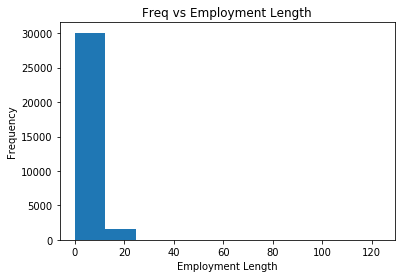

Text(0.5, 1.0, 'Freq vs Interest Rate')

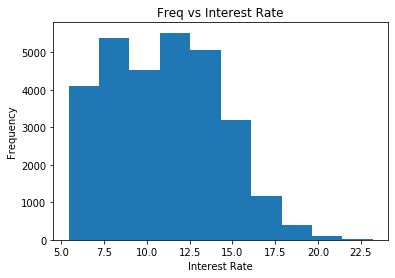

In [11]:
plt.hist(df['person_emp_length'])
plt.xlabel("Employment Length")
plt.ylabel("Frequency")
plt.title("Freq vs Employment Length")
plt.show()
plt.hist(df['loan_int_rate'])
plt.xlabel("Interest Rate")
plt.ylabel("Frequency")
plt.title("Freq vs Interest Rate")

In [12]:
emp_len_null = df[df['person_emp_length'].isnull()].index
int_rate_null = df[df['loan_int_rate'].isnull()].index
df['person_emp_length'].fillna((df['person_emp_length'].median()), inplace=True)
df['loan_int_rate'].fillna((df['loan_int_rate'].median()), inplace = True)

Text(0.5, 1.0, 'Interest Rate vs Age')

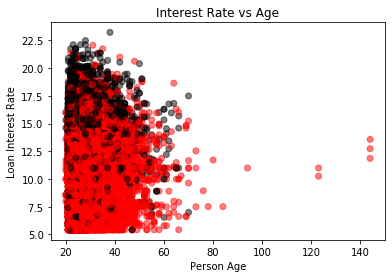

In [15]:
colors = ["red","black"]
plt.scatter(df['person_age'], df['loan_int_rate'],
            c = df['loan_status'],
            cmap = mpl.colors.ListedColormap(colors), alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.title("Interest Rate vs Age")

In [16]:
df_clean1 = df[df['person_age']<=100]

df[df['person_age']>100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,10.99,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


In [17]:
pd.crosstab(df_clean1['cb_person_default_on_file'], df_clean1['loan_grade'])

loan_grade,A,B,C,D,E,F,G
cb_person_default_on_file,,,,,,,
N,10777,10448,3200,1750,499,129,28
Y,0,0,3256,1876,465,112,36


In [18]:
pd.crosstab(df_clean1['cb_person_default_on_file'], df_clean1['loan_intent'], 
            values = df_clean1['loan_int_rate'], aggfunc = 'median')

loan_intent,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
cb_person_default_on_file,,,,,,
N,10.62,10.62,10.74,10.74,10.65,10.65
Y,14.09,13.85,14.09,14.11,14.10,13.99


In [19]:
default_hist_status_tab = pd.crosstab(df_clean1['cb_person_default_on_file'], df_clean1['loan_status'])
default_hist_status_tab

loan_status,0,1
cb_person_default_on_file,,
N,21895,4936
Y,3573,2172


In [20]:
total1 = default_hist_status_tab.iloc[0].sum()
print(total1,"customers did not have a previous default history")

26831 customers did not have a previous default history
